In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from matplotlib.patches import Ellipse
from matplotlib.patches import Patch
import plotly.graph_objects as go
import seaborn as sns
import math as m

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/K-means Data Science/projeto kmeans/Banknote-authentication-dataset-.csv')

In [ ]:
data.loc[0]

V1    3.6216
V2    8.6661
Name: 0, dtype: float64

In [ ]:
data.iloc[:,0]

0       3.62160
1       4.54590
2       3.86600
3       3.45660
4       0.32924
         ...   
1367    0.40614
1368   -1.38870
1369   -3.75030
1370   -3.56370
1371   -2.54190
Name: V1, Length: 1372, dtype: float64

In [ ]:
type(data)

#transformando em array np caso precise
df_array = np.array(data)

In [ ]:
# verifanco valores nulos
data['V2'].isnull().sum()


0

In [ ]:
data.iloc[:,0].max()

6.8248

In [ ]:
# dados estatísticos
df_array= np.array(data)
media = np.mean(data, 0)
std_dev = np.std(data, 0)
l_max = []
l_min = []
for i in range(len(data.columns)):
  maximo = data.iloc[:,i].max()
  minimo = data.iloc[:,i].min()
  l_max.append(maximo)
  l_min.append(minimo)

In [ ]:
print('Media \n', media)
print()
print('Desvio padrão \n', std_dev)
print()
print('maximo', l_max)
print('minimo', l_min)


Media 
 V1    0.433735
V2    1.922353
dtype: float64

Desvio padrão 
 V1    2.841726
V2    5.866907
dtype: float64

maximo [6.8248, 12.9516]
minimo [-7.0421, -13.7731]


In [ ]:
# coeficiente de de variação
"""
O coeficiente de variação é uma medida relativa de variabilidade que ajuda a
comparar a dispersão dos dados em diferentes conjuntos de dados que podem ter
diferentes escalas ou magnitudes. A fórmula para o coeficiente de variação (CV)
é:
CV = (desvio padrão/ media)*100
"""
cv1 = std_dev[0]/media[0]
cv2 = std_dev[1]/media[1]
print(f'cv1: {cv1*100:,.2f}%\ncv2: {cv2*100:,.2f}%')

cv1: 655.18%
cv2: 305.19%


In [ ]:
data['V1']

0       3.62160
1       4.54590
2       3.86600
3       3.45660
4       0.32924
         ...   
1367    0.40614
1368   -1.38870
1369   -3.75030
1370   -3.56370
1371   -2.54190
Name: V1, Length: 1372, dtype: float64

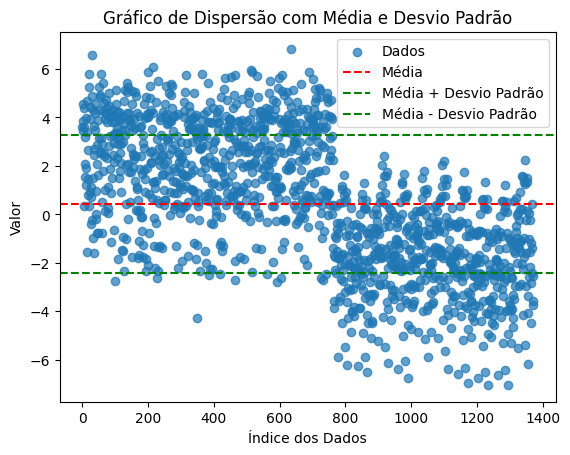

In [ ]:
# uma análise de desvio padrão e média dos daddos V1

# Criando o gráfico de barras com Plotly
plt.scatter(data.index, data['V1'], label='Dados',alpha =0.7)
plt.axhline(media[0], color='red', linestyle='--', label='Média')
plt.axhline(media[0] + std_dev[0], color='green', linestyle='--', label='Média + Desvio Padrão')
plt.axhline(media[0] - std_dev[0], color='green', linestyle='--', label='Média - Desvio Padrão')
plt.xlabel('Índice dos Dados')
plt.ylabel('Valor')
plt.legend()
plt.title('Gráfico de Dispersão com Média e Desvio Padrão')
plt.show()

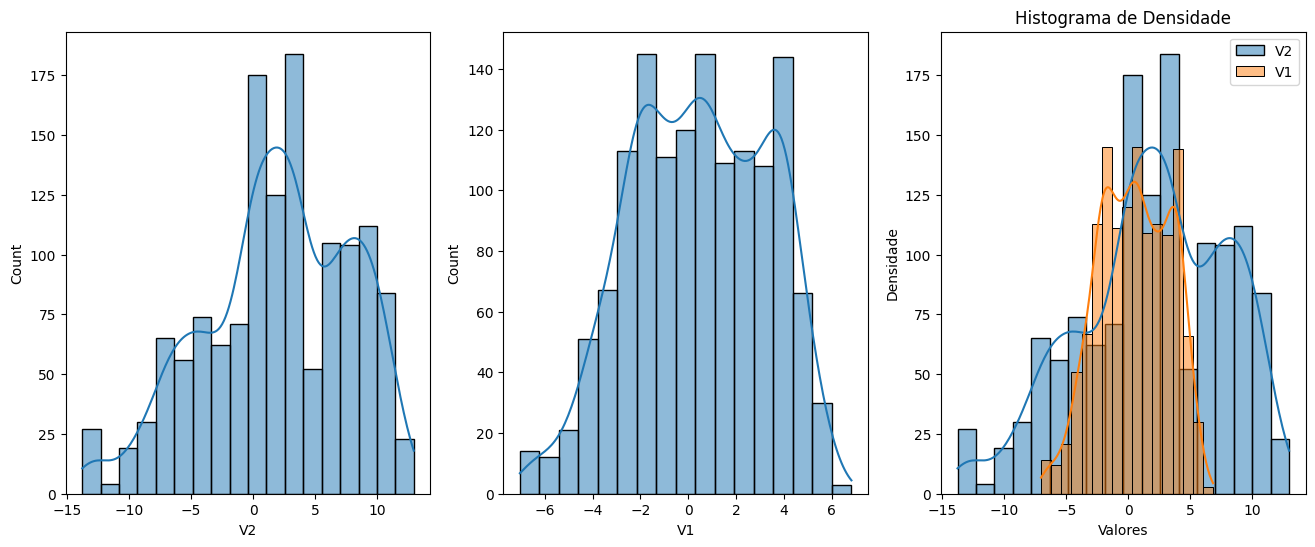

In [ ]:
# Criar o histograma de densidade dos dados
"""
Usamos sns.histplot para criar o histograma de densidade, onde dados são os
dados que queremos plotar e kde=True indica que queremos plotar também a curva
de densidade kernel."""

# criando figura com 1 linha e 3 colunas (3 gráf)
fig, ax = plt.subplots(1,3, figsize=(16, 6))

# primeira linha gráfico de V1
sns.histplot(data['V2'], kde=True,ax= ax[0])

# primeira linha gráfico de V2
sns.histplot(data['V1'], kde=True, ax =ax[1])
#ax[1].set_xlabel('V1')

# curava de densidade para ocmparação
sns.histplot(data['V2'], kde=True,ax= ax[2],label = 'V2')
sns.histplot(data['V1'], kde=True, ax =ax[2], label = 'V1')
plt.xlabel('Valores')
plt.ylabel('Densidade')
plt.title('Histograma de Densidade')
plt.legend()
plt.show()

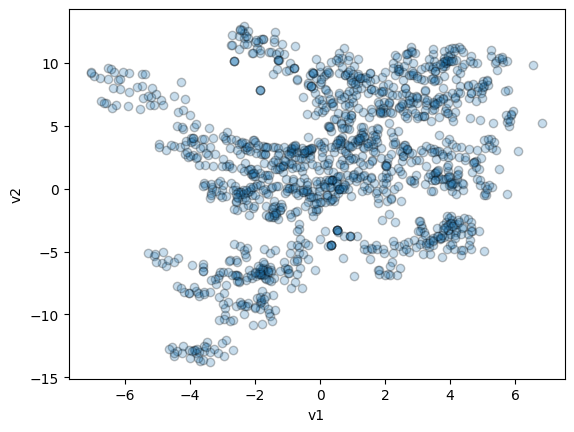

In [ ]:
v1 = data['V1']
v2 = data['V2']

plt.scatter(v1,v2, alpha = 0.25, edgecolors='k' )
plt.xlabel('v1')
plt.ylabel('v2')

plt.show()

In [ ]:

"""
De antemão não existe relação de dependência e independência
 onde não temos classes a serem previstas.
 Podemos notar um cluster de dados sem um padrão covariacional

Podemos ver que o recurso V2 tem uma média em torno de 1,9 com um desvio padrão
de 5,86
Bom, inicialmente não entendi as características dos dados.
Por exemplo, o que significa o valor negativo em cada variável?
Uma hipótese é normalizar as variáveis ​​e usar k-médias para
tente separar os dados por clusters.

Beforehand there is no relationship of dependence and independence
 where we do not have classes to be predicted.
 We can notice a cluster of data without a covariational pattern
 We can see that feature V2 has an average of around 1.9 with a  standard deviation
of 5.86

Well, initially I didn't understand the characteristics of the data.
For example, what does the negative value in each variable mean?
One hypothesis is to normalize the variables and use k-means to
try to separate the data by clusters.

 """

"\nDe antemão não existe relação de dependência e independência\n onde não temos classes a serem previstas.\n Podemos notar um cluster de dados sem um padrão covariacional\n\nPodemos ver que o recurso V2 tem uma média em torno de 1,9 com um desvio padrão\nde 5,86\nBom, inicialmente não entendi as características dos dados.\nPor exemplo, o que significa o valor negativo em cada variável?\nUma hipótese é normalizar as variáveis \u200b\u200be usar k-médias para\ntente separar os dados por clusters.\n\nBeforehand there is no relationship of dependence and independence\n where we do not have classes to be predicted.\n We can notice a cluster of data without a covariational pattern\n We can see that feature V2 has an average of around 1.9 with a  standard deviation\nof 5.86\n\nWell, initially I didn't understand the characteristics of the data.\nFor example, what does the negative value in each variable mean?\nOne hypothesis is to normalize the variables and use k-means to\ntry to separate t

In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure(go.Scatter(x=v1, y=v2, mode='markers',  marker=dict(opacity=0.7)))
fig.update_layout(title='Gráfico de Dispersão com Plotly',
                  xaxis_title='v1',
                  yaxis_title='v2')

In [ ]:
v1_v2 = np.column_stack((v1,v2))

In [ ]:
# método cotovelo para definir numero de cluster
"""
KMenas calcula a distância das observações até o centro do agrupamento que ela pertence,
o ideal é que essa distância seja a mínima possível.
Encontrar uma quantiadde de agrupamento em que a soma dos quadrados intra-cluster
seja menor possível.
o 'inertial' do kmean é essa 'conta'"""

wcss = []
for n in range(1,20):
  kmeans = KMeans(n_clusters=n)
  kmeans.fit(X=v1_v2)
  wcss.append((n,kmeans.inertia_))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [ ]:
wcss[2]

(3, 16619.817053013183)

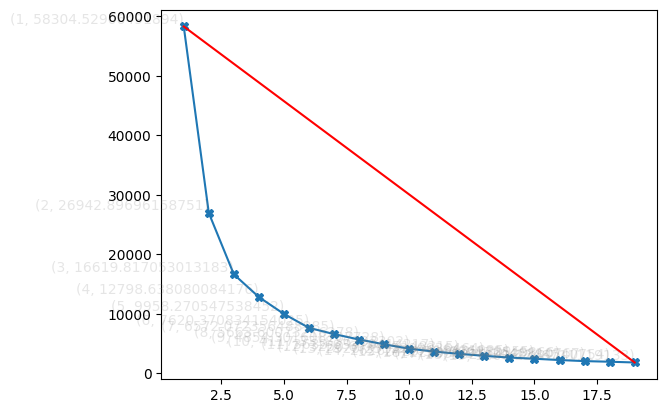

In [ ]:
plt.plot([w[0] for w in wcss],[w[1] for w in wcss], marker="X", linewidth = 1.5)

# Encontrando os pontos mais extremos
min_x, min_y = min(wcss, key=lambda x: x[0])
max_x, max_y = max(wcss, key=lambda x: x[0])

# Plotando a linha entre os pontos mais extremos
plt.plot([min_x, max_x], [min_y, max_y], linestyle='-', color='red', linewidth=1.5)

for point in wcss:
    plt.text(point[0], point[1], f'({point[0]}, {point[1]})', ha='right', va='bottom', color = 'gray', alpha = 0.2)


plt.show()

In [ ]:
m.sqrt(2)

1.4142135623730951

In [ ]:
""" o equilibrio entre maior homogeneidade dentro do cluster e a maior diferença
entre cluster, é o ponto da curva mais distante de uma reta traçada entre os extremo."""


x1,y1 = 2, wcss[0][1]
x2,y2 = 20, wcss[len(wcss)-1][1]

distance = []
for i in range(len(wcss)):
  x0 = i+2
  y0= wcss[i][1]
  numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
  denominator = m.sqrt((y2-y1)**2 + (x2-x1)**2)
  distance.append(numerator/denominator)

""" Distance é a lista contendo somas dos quadrados para cada quantidade
de cluster que calculamos em wcss. A quantiade ótima de cluster é
distance.index(max(distance))"""

' Distance é a lista contendo somas dos quadrados para cada quantidade\nde cluster que calculamos em wcss. A quantiade ótima de cluster é\ndistance.index(max(distance))'

In [ ]:
# ótimo quantidaed de cluster
oc = distance.index(max(distance)) + 2
oc

5

Porém, nosso caso é de sistema binário, dois cluster. Vamos aplciar k-means para 2 cluster

In [ ]:
km_res = KMeans(n_clusters=2).fit(v1_v2)
center = km_res.cluster_centers_
labels = km_res.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
center
#labels

array([[ 0.86960048,  6.12717909],
       [-0.12376677, -3.45591265]])

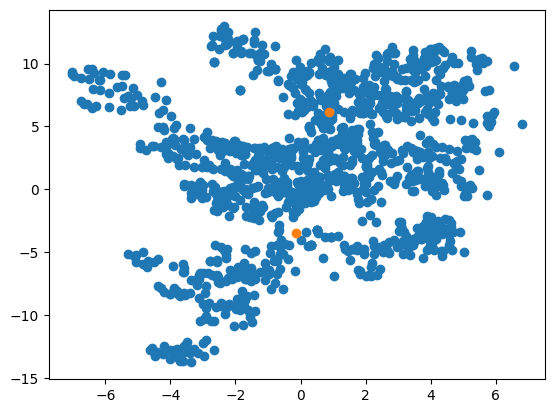

In [ ]:
plt.scatter(v1,v2)
plt.scatter(center[:,0],center[:,1])

In [ ]:
cluster_0 = []
cluster_1 = []
cluster_2 = []

# Separar os dados de cada cluster e armazenar nas arrays correspondentes
for i, label in enumerate(labels):
    if label == 0:
        cluster_0.append(v1_v2[i])
    elif label == 1:
        cluster_1.append(v1_v2[i])
    elif label == 2:
        cluster_2.append(v1_v2[i])

# Converter as arrays para numpy arrays
cluster_0 = np.array(cluster_0)
cluster_1 = np.array(cluster_1)
cluster_2 = np.array(cluster_2)
print(cluster_2)

[]


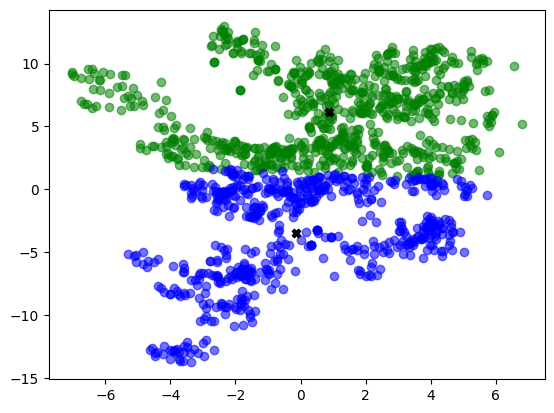

In [ ]:
plt.scatter(cluster_0[:,0],cluster_0[:,1], color = 'green', alpha = 0.55)
plt.scatter(cluster_1[:,0],cluster_1[:,1], color = 'blue', alpha = 0.55)
plt.scatter(center[:,0],center[:,1], marker = 'X', color = 'black')

plt.show()

In [ ]:
# array de clusters
clusters = [v1_v2[labels == i] for i in range(km_res.n_clusters)]
clusters

[array([[ 3.6216 ,  8.6661 ],
        [ 4.5459 ,  8.1674 ],
        [ 3.4566 ,  9.5228 ],
        ...,
        [-0.24745,  1.9368 ],
        [-2.41   ,  3.7433 ],
        [ 0.40614,  1.3492 ]]),
 array([[  3.866  ,  -2.6383 ],
        [  0.32924,  -4.4552 ],
        [  2.0922 ,  -6.81   ],
        ...,
        [ -3.7503 , -13.4586 ],
        [ -3.5637 ,  -8.3827 ],
        [ -2.5419 ,  -0.65804]])]

# Fazer inúmeras vezes o treino com normalização

In [ ]:
print(list(enumerate(labels)))

[(0, 0), (1, 0), (2, 1), (3, 0), (4, 1), (5, 0), (6, 0), (7, 1), (8, 0), (9, 0), (10, 0), (11, 1), (12, 0), (13, 0), (14, 0), (15, 1), (16, 0), (17, 0), (18, 1), (19, 0), (20, 0), (21, 1), (22, 0), (23, 0), (24, 0), (25, 1), (26, 1), (27, 0), (28, 0), (29, 1), (30, 1), (31, 0), (32, 0), (33, 0), (34, 1), (35, 0), (36, 0), (37, 1), (38, 0), (39, 0), (40, 0), (41, 0), (42, 0), (43, 0), (44, 0), (45, 0), (46, 0), (47, 0), (48, 0), (49, 0), (50, 1), (51, 0), (52, 0), (53, 0), (54, 0), (55, 1), (56, 0), (57, 0), (58, 1), (59, 0), (60, 1), (61, 0), (62, 0), (63, 1), (64, 0), (65, 0), (66, 1), (67, 0), (68, 0), (69, 0), (70, 1), (71, 1), (72, 0), (73, 1), (74, 0), (75, 0), (76, 0), (77, 0), (78, 0), (79, 0), (80, 0), (81, 0), (82, 0), (83, 0), (84, 0), (85, 0), (86, 0), (87, 0), (88, 1), (89, 1), (90, 0), (91, 0), (92, 0), (93, 1), (94, 0), (95, 1), (96, 0), (97, 1), (98, 0), (99, 0), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 0), (106, 0), (107, 0), (108, 0), (109, 0), (110, 1),

In [ ]:
print(list(enumerate(v1_v2)))

[(0, array([3.6216, 8.6661])), (1, array([4.5459, 8.1674])), (2, array([ 3.866 , -2.6383])), (3, array([3.4566, 9.5228])), (4, array([ 0.32924, -4.4552 ])), (5, array([4.3684, 9.6718])), (6, array([3.5912, 3.0129])), (7, array([ 2.0922, -6.81  ])), (8, array([3.2032, 5.7588])), (9, array([1.5356, 9.1772])), (10, array([1.2247, 8.7779])), (11, array([ 3.9899, -2.7066])), (12, array([1.8993, 7.6625])), (13, array([-1.5768, 10.843 ])), (14, array([3.404 , 8.7261])), (15, array([ 4.6765, -3.3895])), (16, array([2.6719, 3.0646])), (17, array([0.80355, 2.8473 ])), (18, array([ 1.4479, -4.8794])), (19, array([ 5.2423, 11.0272])), (20, array([5.7867, 7.8902])), (21, array([ 0.3292, -4.4552])), (22, array([ 3.9362, 10.1622])), (23, array([0.93584, 8.8855 ])), (24, array([4.4338, 9.887 ])), (25, array([ 0.7057, -5.4981])), (26, array([ 1.1432, -3.7413])), (27, array([-0.38214,  8.3909 ])), (28, array([6.5633, 9.8187])), (29, array([ 4.8906, -3.3584])), (30, array([-0.24811, -0.17797])), (31, arr

In [ ]:
data.head(10)

V1      V2
0  3.62160  8.6661
1  4.54590  8.1674
2  3.86600 -2.6383
3  3.45660  9.5228
4  0.32924 -4.4552
5  4.36840  9.6718
6  3.59120  3.0129
7  2.09220 -6.8100
8  3.20320  5.7588
9  1.53560  9.1772

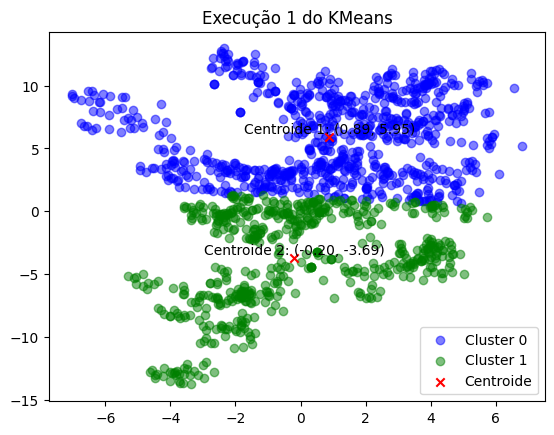

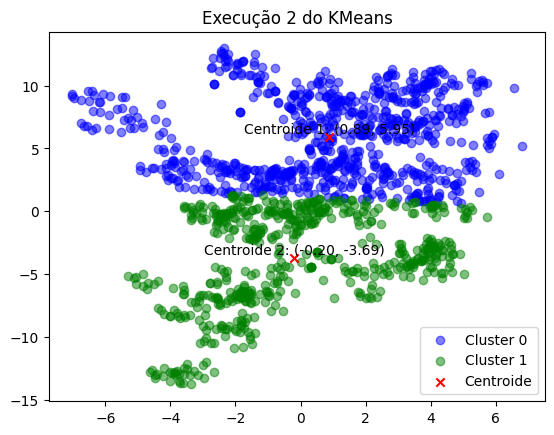

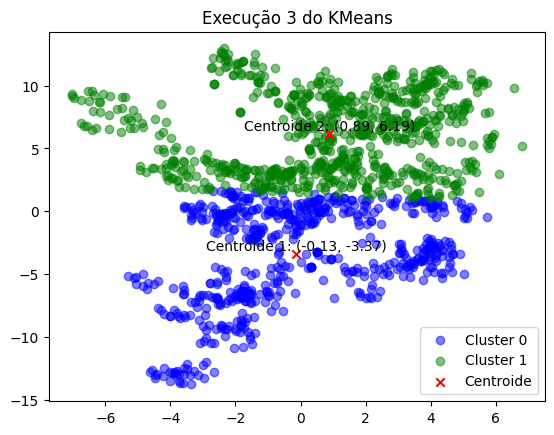

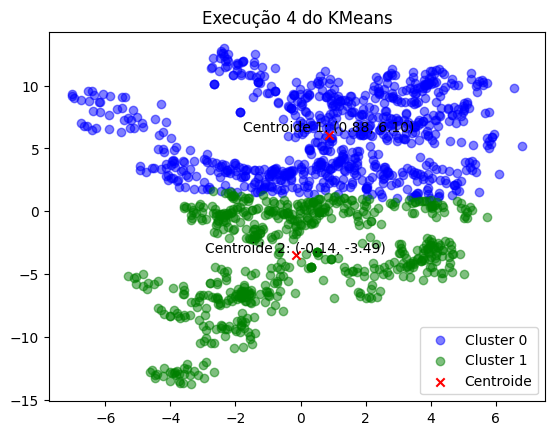

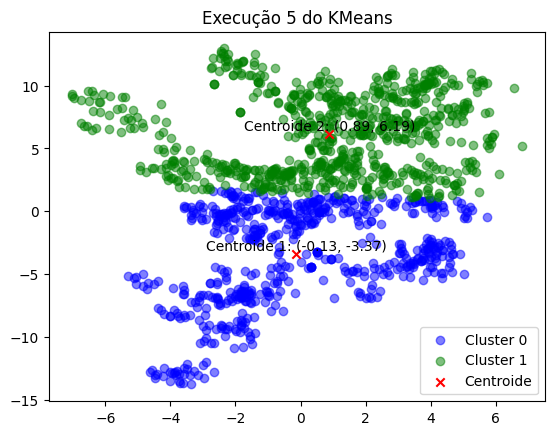

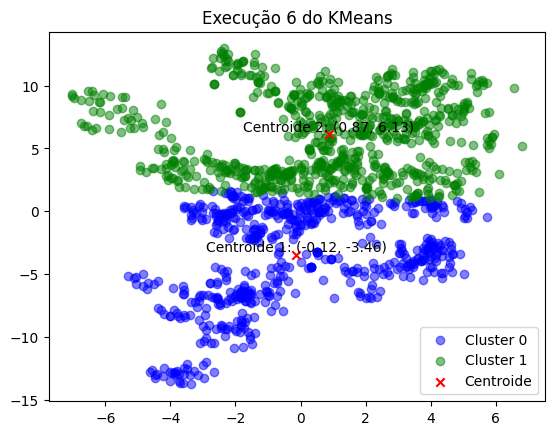

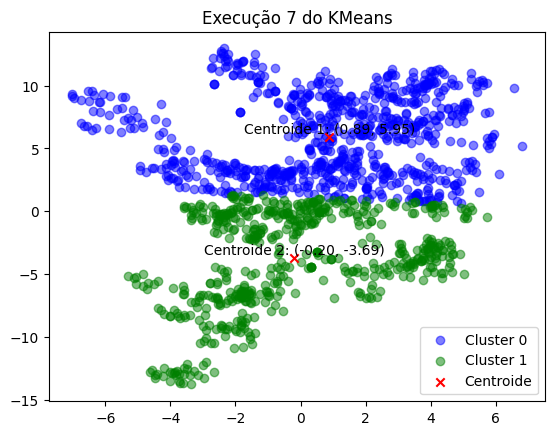

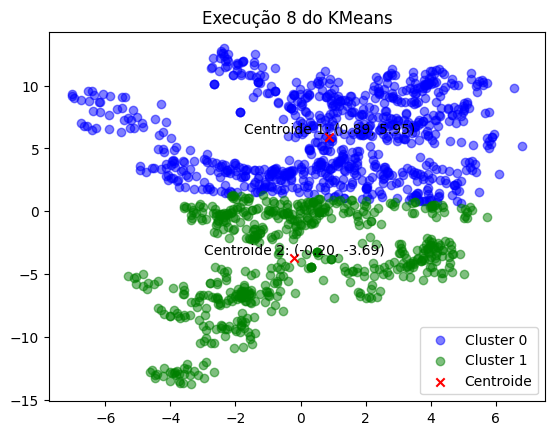

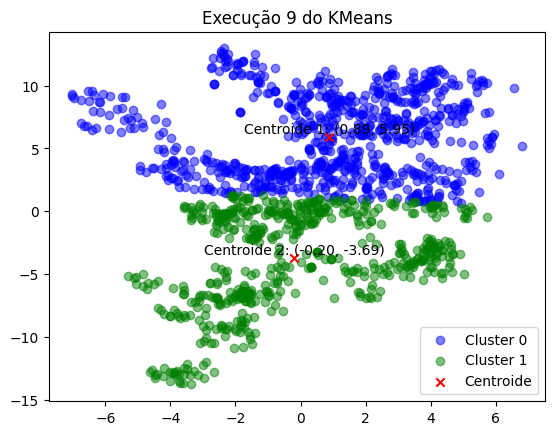

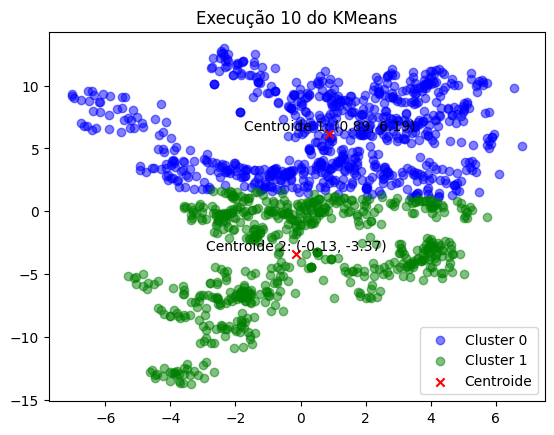

[array([[ 0.88705643,  5.94561166],
       [-0.19838275, -3.68774038]]), array([[ 0.88705643,  5.94561166],
       [-0.19838275, -3.68774038]]), array([[-0.13390228, -3.37449055],
       [ 0.89083286,  6.18770618]]), array([[ 0.87922314,  6.1011177 ],
       [-0.14286612, -3.48628197]]), array([[-0.13390228, -3.37449055],
       [ 0.89083286,  6.18770618]]), array([[-0.12376677, -3.45591265],
       [ 0.86960048,  6.12717909]]), array([[ 0.88705643,  5.94561166],
       [-0.19838275, -3.68774038]]), array([[ 0.88705643,  5.94561166],
       [-0.19838275, -3.68774038]]), array([[ 0.88705643,  5.94561166],
       [-0.19838275, -3.68774038]]), array([[ 0.89083286,  6.18770618],
       [-0.13390228, -3.37449055]])]


In [ ]:
n_runs = 10
cores = np.array(['b', 'g'])
centroid_list = []
for i in range(n_runs):
  km_res = KMeans(n_clusters=2, n_init='auto').fit(v1_v2)
  center = km_res.cluster_centers_   # retorna o centro do treino
  labels = km_res.labels_  # acesso dos rótulos dos cluster
  centroid_list.append(center)
  for cluster_id in np.unique(labels):  # com tem dois cluster [0,1]
    plt.scatter(v1_v2[labels == cluster_id,0], # condição labels == cluster_id
                v1_v2[labels == cluster_id,1],
                color = cores[cluster_id],
                alpha = 0.5,
                label = f'Cluster {cluster_id}')
  # fazer um marca do centroide
  plt.scatter(center[:,0],center[:,1], marker = 'x', color = 'red',label = f'Centroide')
  plt.title(f'Execução {i+1} do KMeans')

  # Adicionando texto com as coordenadas dos centroides
  for idx, c in enumerate(center):
    plt.text(c[0], c[1], f'Centroide {idx+1}: ({c[0]:.2f}, {c[1]:.2f})', fontsize=10, ha='center', va='bottom')

  plt.legend()
  plt.show()


print(centroid_list)

Com dados normalizados

In [ ]:
v12_min = np.min(v1_v2,0) # array dos valores minimos de cada variável (colunas axi =0)
v12_max = np.max(v1_v2,0) # array dos valores máximos de cada variável
v12_normal = 2*(v1_v2 - v12_min) / (v12_max - v12_min) # normalizção no dominio [0,1]
v12_normal
v12_normal[:,0]

array([1.53800777, 1.67131803, 1.57325718, ..., 0.47477086, 0.50168387,
       0.64905639])

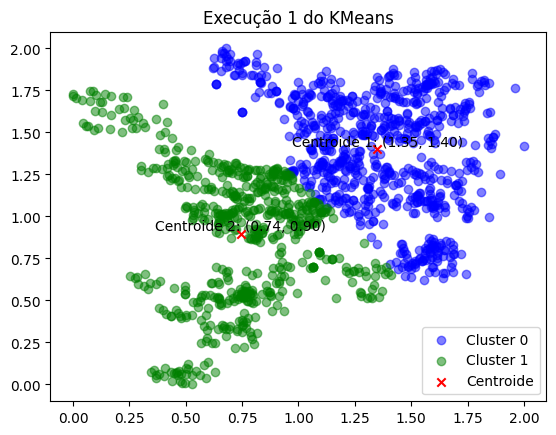

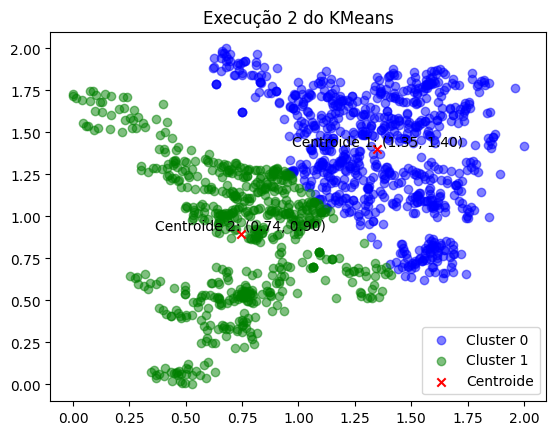

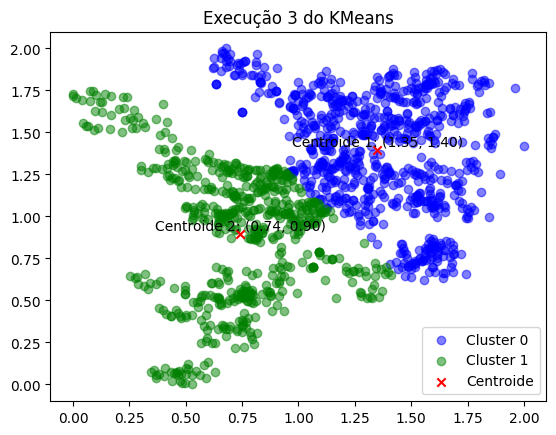

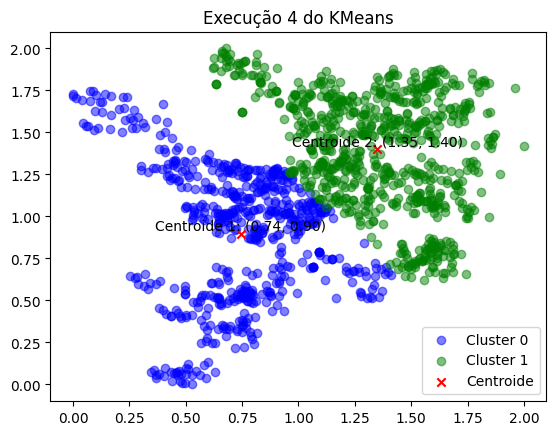

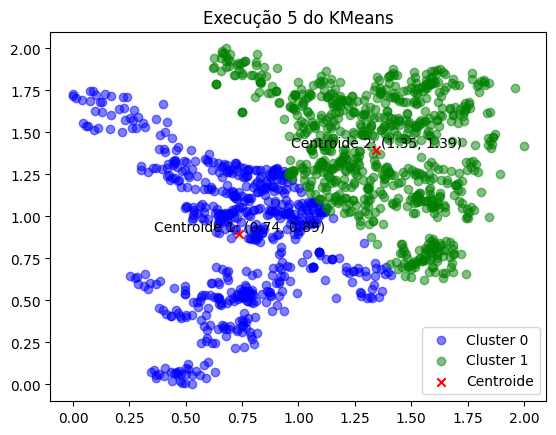

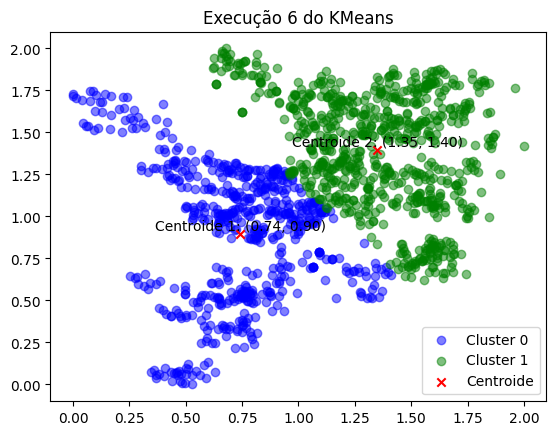

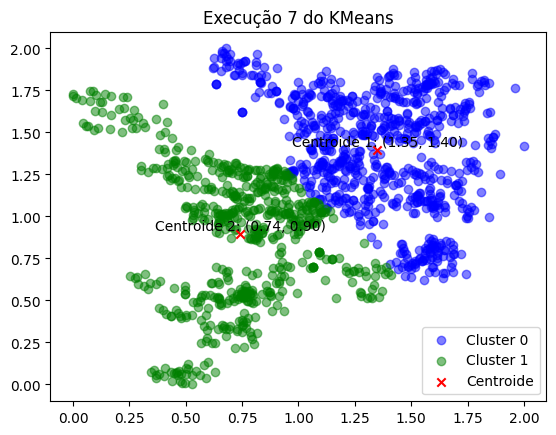

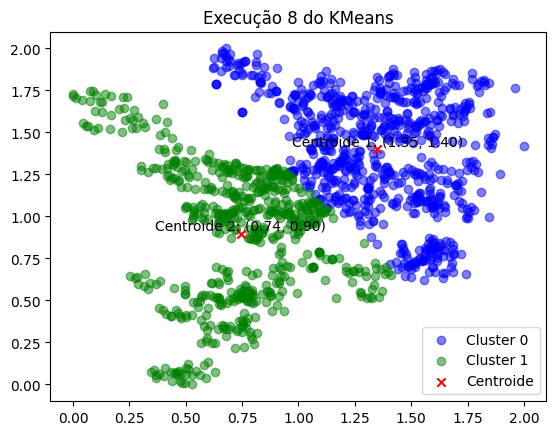

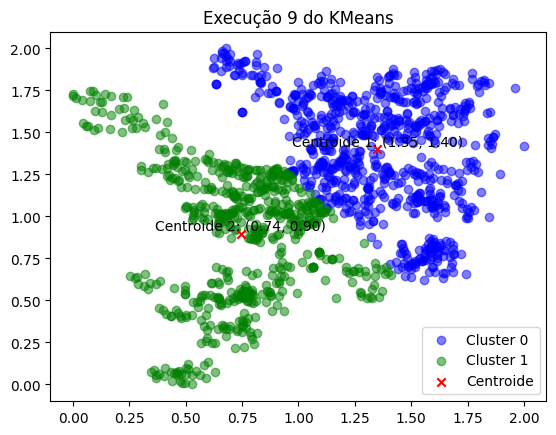

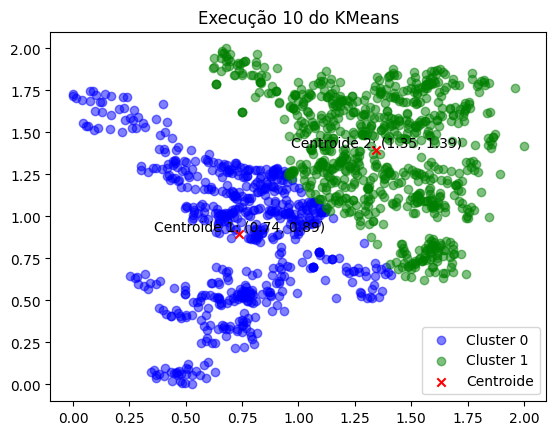

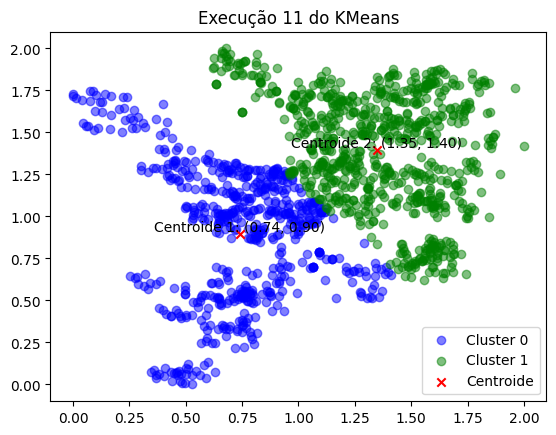

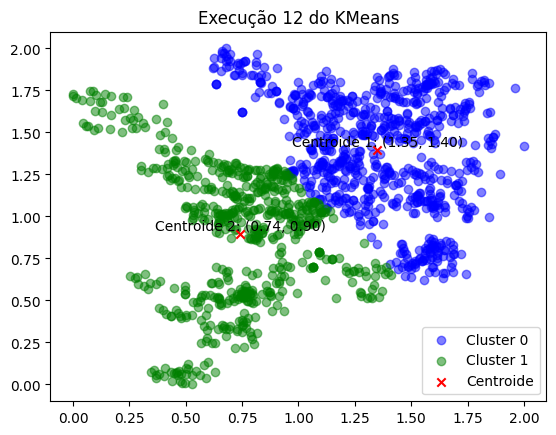

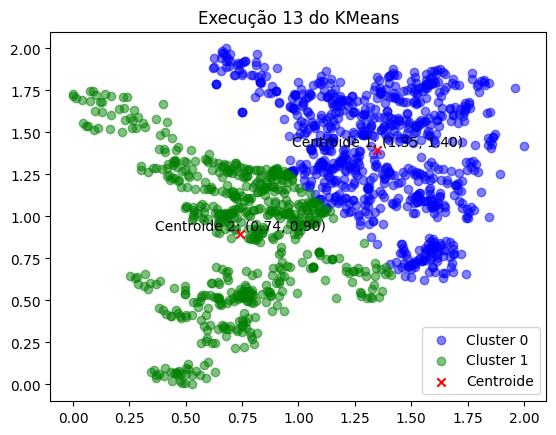

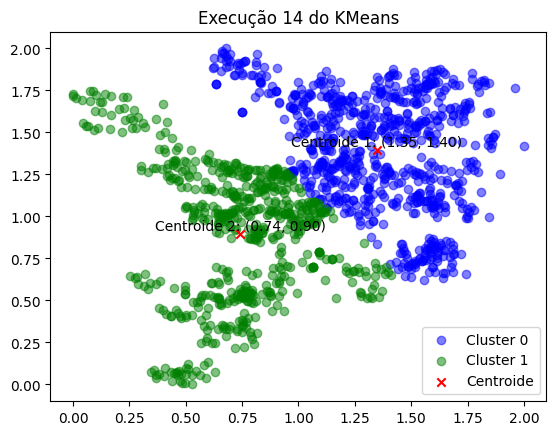

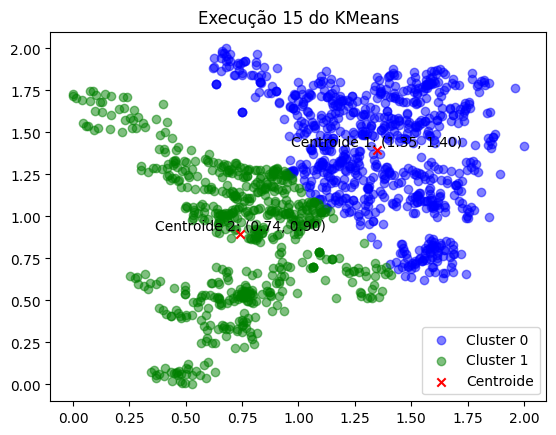

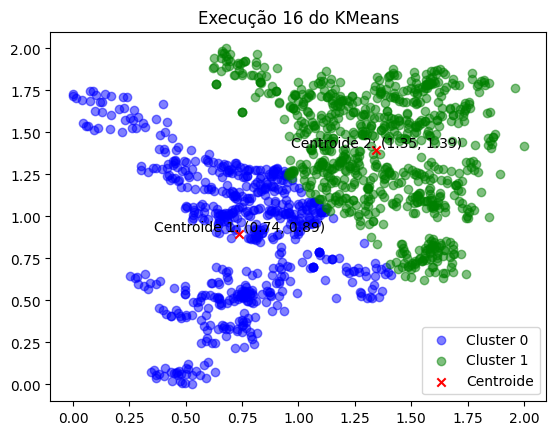

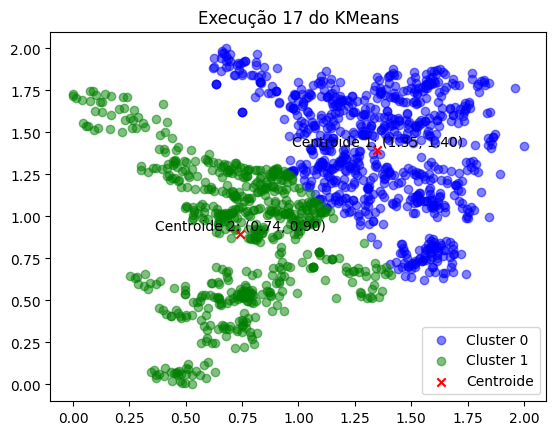

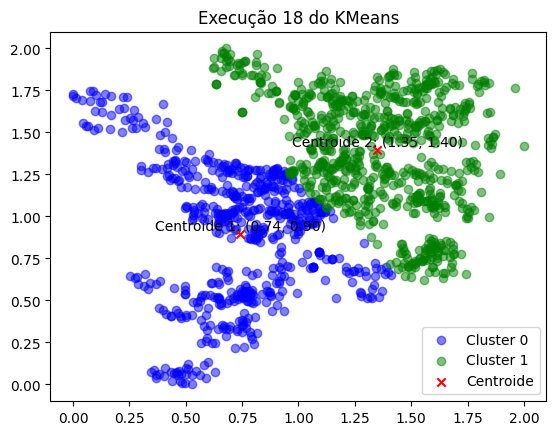

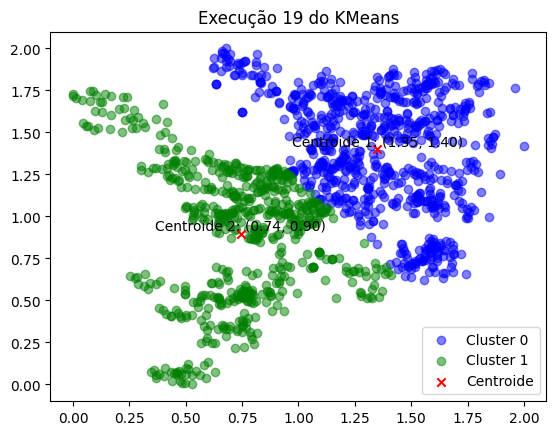

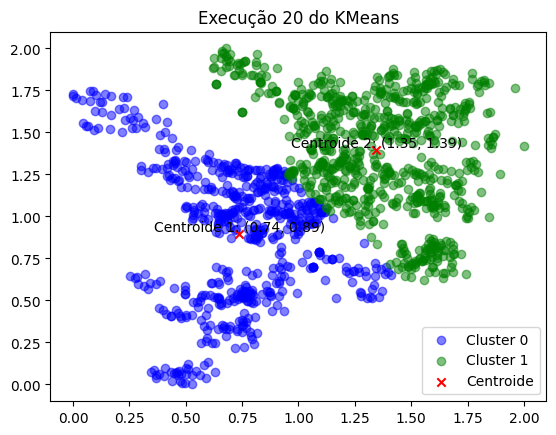

[array([[1.34881892, 1.39976392],
       [0.74417452, 0.89663506]]), array([[1.34897934, 1.39876785],
       [0.74298951, 0.8970476 ]]), array([[1.34875848, 1.39742356],
       [0.74128099, 0.89707963]]), array([[0.74417452, 0.89663506],
       [1.34881892, 1.39976392]]), array([[0.73679142, 0.89334272],
       [1.34516813, 1.39449696]]), array([[0.74128099, 0.89707963],
       [1.34875848, 1.39742356]]), array([[1.34875848, 1.39742356],
       [0.74128099, 0.89707963]]), array([[1.34897934, 1.39876785],
       [0.74298951, 0.8970476 ]]), array([[1.34897934, 1.39876785],
       [0.74298951, 0.8970476 ]]), array([[0.73679142, 0.89334272],
       [1.34516813, 1.39449696]]), array([[0.73911794, 0.89562355],
       [1.34729844, 1.39596272]]), array([[1.34875848, 1.39742356],
       [0.74128099, 0.89707963]]), array([[1.34905622, 1.39786997],
       [0.74190386, 0.89734281]]), array([[1.34846501, 1.396971  ],
       [0.74065172, 0.89682472]]), array([[1.34846501, 1.396971  ],
       [0.7406

In [ ]:
from sklearn.metrics import silhouette_score
n_runs = 20
cores = np.array(['b', 'g'])

# lista para armazenar os centroidos
centroid_list = []
silhouette_scores = []
# numeros de execução de treino kmeans
for i in range(n_runs):
  km_res = KMeans(n_clusters=2, n_init='auto').fit(v12_normal)

  # dados para análises:
  center = km_res.cluster_centers_   # retorna o centro do treino
  labels = km_res.labels_  # acesso dos rótulos dos cluster
  centroid_list.append(center)
  silhouette_avg = silhouette_score(v12_normal, labels)
  silhouette_scores.append(silhouette_avg)

  for cluster_id in np.unique(labels):  # com tem dois cluster [0,1]
    plt.scatter(v12_normal[labels == cluster_id,0], # condição labels == cluster_id
                v12_normal[labels == cluster_id,1],
                color = cores[cluster_id],
                alpha = 0.5,
                label = f'Cluster {cluster_id}')
  # fazer um marca do centroide
  plt.scatter(center[:,0],center[:,1], marker = 'x', color = 'red',label = f'Centroide')
  plt.title(f'Execução {i+1} do KMeans')

  # Adicionando texto com as coordenadas dos centroides
  for idx, c in enumerate(center):
    plt.text(c[0], c[1], f'Centroide {idx+1}: ({c[0]:.2f}, {c[1]:.2f})', fontsize=10, ha='center', va='bottom')

  plt.legend()
  plt.show()


print(centroid_list)

In [ ]:
centroid_list

[array([[1.34881892, 1.39976392],
        [0.74417452, 0.89663506]]),
 array([[1.34897934, 1.39876785],
        [0.74298951, 0.8970476 ]]),
 array([[1.34875848, 1.39742356],
        [0.74128099, 0.89707963]]),
 array([[0.74417452, 0.89663506],
        [1.34881892, 1.39976392]]),
 array([[0.73679142, 0.89334272],
        [1.34516813, 1.39449696]]),
 array([[0.74128099, 0.89707963],
        [1.34875848, 1.39742356]]),
 array([[1.34875848, 1.39742356],
        [0.74128099, 0.89707963]]),
 array([[1.34897934, 1.39876785],
        [0.74298951, 0.8970476 ]]),
 array([[1.34897934, 1.39876785],
        [0.74298951, 0.8970476 ]]),
 array([[0.73679142, 0.89334272],
        [1.34516813, 1.39449696]]),
 array([[0.73911794, 0.89562355],
        [1.34729844, 1.39596272]]),
 array([[1.34875848, 1.39742356],
        [0.74128099, 0.89707963]]),
 array([[1.34905622, 1.39786997],
        [0.74190386, 0.89734281]]),
 array([[1.34846501, 1.396971  ],
        [0.74065172, 0.89682472]]),
 array([[1.34846501,

In [ ]:
np.unique(labels)
labels

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

Vamos fazer teste de coeficiente de variação do modelo a partir dos centroids de teste (centroid_list).
No código acim eu analise por gráfico. Posso apenas fazer o código para guardar os centroids


```
for i in range(n_runs):
  km_res = KMeans(n_clusters=2, n_init='auto').fit(v12_normal)
  center = km_res.cluster_centers_   # retorna o centro do treino
  labels = km_res.labels_  # acesso dos rótulos dos cluster
  centroid_list.append(center)
```



In [ ]:
# retorna uma tupla de dimensão (linha, coluna)
v12_normal.shape

(1372, 2)

In [ ]:
# Calcular o coeficiente de variação para cada coordenada dos centroides
cv_list = []
for dim in range(v12_normal.shape[1]):

    #estamos criando um array numpy que contém todas as coordenadas de uma dimensão específica para cada execução do K-means
    centroids_dim = np.array([centroid[:, dim] for centroid in centroid_list])
    #print(centroids_dim)
    std_dev = np.std(centroids_dim, axis=0)
    mean = np.mean(centroids_dim, axis=0)
    cv = (std_dev / mean) * 100  # Coeficiente de variação em porcentagem
    cv_list.append(cv)

print("Coeficiente de Variação por coordenada dos centroides:")
for dim, cv in enumerate(cv_list):
    print(f"Dimensão {dim+1}: {cv}")

Coeficiente de Variação por coordenada dos centroides:
Dimensão 1: [27.03246588 30.10025255]
Dimensão 2: [20.59589266 22.295343  ]


Interpretação de CV

Dimensão 1:
- Para a dimensão 1, os valores do CV são [29.09894312, 29.06357582].
Isso indica que a variabilidade relativa dos centroides em relação à média é cerca de 29% para a primeira coordenada dos centroides.
Um CV de 29% pode ser considerado moderado a alto, sugerindo uma dispersão relativamente significativa dos centroides em torno da média para essa dimensão.

Dimensão 2:
- Para a dimensão 2, os valores do CV são [21.86598253, 21.83932778].
Isso indica que a variabilidade relativa dos centroides em relação à média é cerca de 22% para a segunda coordenada dos centroides.
Um CV de 22% também pode ser considerado moderado, indicando uma dispersão moderada dos centroides em torno da média para essa dimensão.

Em resumo, os resultados do coeficiente de variação indicam que os centroides dos clusters têm uma variabilidade relativa moderada a alta em relação à média para ambas as dimensões analisadas. Isso sugere que os centroides estão dispersos em torno da média, o que pode indicar uma certa instabilidade nos clusters ou uma distribuição dos dados que não é uniforme em relação aos centroides.

Fazer uma analise por silhueta

Índice de Silhueta: Utilize o índice de silhueta para avaliar a qualidade dos clusters e a separação entre eles. O índice de silhueta varia de -1 a 1, onde valores mais próximos de 1 indicam clusters bem definidos e separados. Calcule o índice de silhueta para cada execução do K-means e analise a média e a variação dos valores obtidos.

a silhueta é uma medida da coesão e separação dos clusters. Ela avalia o quão bem uma amostra está agrupada com outras amostras no mesmo cluster em comparação com o quão bem ela está separada dos clusters vizinhos. Quanto mais alta a silhueta, melhor é a qualidade do agrupamento.

- **Média** da Silhueta (Silhouette Score Médio): A média do coeficiente de silhueta de todos os pontos de dados em um conjunto de dados fornece uma medida geral da qualidade do agrupamento. Um valor médio de silhueta mais próximo de 1 indica clusters bem definidos e separados, enquanto valores próximos de 0 ou negativos indicam que os clusters podem estar sobrepostos ou mal definidos.
  O coeficiente de silhueta mede o quão bem uma amostra é agrupada com outras amostras em seu próprio cluster em comparação com outros clusters. Ele varia de -1 a 1, onde:

  - Um valor próximo de 1 indica que a amostra está bem agrupada e está longe dos outros clusters.
  
  - Um valor próximo de 0 indica que a amostra está próxima da fronteira entre dois clusters.
  - Um valor próximo de -1 indica que a amostra pode ter sido atribuída ao cluster errado

- **Variação** da Silhueta (Desvio Padrão da Silhueta): A variação (ou desvio padrão) do coeficiente de silhueta mostra a dispersão dos valores de silhueta em relação à média. Uma baixa variação indica que a maioria dos pontos está próxima da média da silhueta, o que sugere que os clusters são consistentes e de alta qualidade. Por outro lado, uma alta variação indica que os valores de silhueta estão mais espalhados, o que pode indicar que os clusters têm tamanhos ou formas diferentes.

In [ ]:
silhouette_scores

[0.38392980245735414,
 0.38394928231231507,
 0.38391381812284353,
 0.38392980245735414,
 0.3838726298724645,
 0.38391381812284353,
 0.38391381812284353,
 0.38394928231231507,
 0.38394928231231507,
 0.3838726298724645,
 0.38394705948077085,
 0.38391381812284353,
 0.38394928231231507,
 0.38391381812284353,
 0.38391381812284353,
 0.3838726298724645,
 0.38394928231231507,
 0.38391381812284353,
 0.38392980245735414,
 0.3838726298724645]

In [ ]:
silhouette_mean = np.mean(silhouette_scores)
silhouette_variance = np.var(silhouette_scores)

In [ ]:
print(silhouette_mean)
print(m.sqrt(silhouette_variance))

0.3839185062382086
2.6931717141763735e-05


Interpretação
Média da Silhueta (0.3839):
- A média da silhueta é um valor positivo próximo de 0.4, o que sugere que os clusters em seu conjunto de dados têm uma qualidade moderada a boa.
- Um valor médio de silhueta entre 0.3 e 0.5 geralmente indica que os clusters estão razoavelmente bem definidos e separados.

Desvio Padrão da Silhueta (2.57e-05):
- O desvio padrão da silhueta é muito baixo, o que indica que os valores de silhueta estão muito próximos da média.
- Isso sugere que a maioria dos pontos de dados tem uma silhueta consistente e próxima da média da silhueta.
- A baixa variação é uma indicação positiva de que os clusters são consistentes e não apresentam grandes diferenças na qualidade da silhueta entre os pontos.

Em resumo, com base nos valores fornecidos, podemos interpretar que os clusters em seu conjunto de dados têm uma qualidade moderada a boa, com uma consistência notável entre os valores de silhueta de diferentes pontos. Isso sugere que o algoritmo de clustering utilizado obteve resultados razoavelmente satisfatórios na separação dos clusters e na definição de suas fronteiras.

# Quero comparar com os valores reais - analise por métrica

- importante: essa métricas são do último treino dos 20 treinos realizados acima. Podia ter inserido isso no for (treinos), porém aqui fica mais didático, mas menos eficiente (pois não crio uam média de cada métrica...)

In [ ]:
from scipy.io.arff import loadarff
from sklearn.datasets import fetch_openml

In [ ]:
# Carregar o conjunto de dados do OpenML usando ID
# url: https://www.openml.org/search?type=data&sort=runs&id=1462&status=active
dataset = fetch_openml(data_id=1462)

# Converter o conjunto de dados para um DataFrame do Pandas
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

# Adicionar a coluna de target ao DataFrame
df['target'] = dataset.target

# Exibir as primeiras linhas do DataFrame
print(df.head())

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning:

The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.



        V1      V2      V3       V4 target
0  3.62160  8.6661 -2.8073 -0.44699      1
1  4.54590  8.1674 -2.4586 -1.46210      1
2  3.86600 -2.6383  1.9242  0.10645      1
3  3.45660  9.5228 -4.0112 -3.59440      1
4  0.32924 -4.4552  4.5718 -0.98880      1


In [ ]:
type(df['target'][0])

str

In [ ]:
# colocar target (mudando o tipo) em inteiro
df['target'] = df['target'].astype(int)

In [ ]:
df

V1        V2       V3       V4  target
0     3.62160   8.66610  -2.8073 -0.44699       1
1     4.54590   8.16740  -2.4586 -1.46210       1
2     3.86600  -2.63830   1.9242  0.10645       1
3     3.45660   9.52280  -4.0112 -3.59440       1
4     0.32924  -4.45520   4.5718 -0.98880       1
...       ...       ...      ...      ...     ...
1367  0.40614   1.34920  -1.4501 -0.55949       2
1368 -1.38870  -4.87730   6.4774  0.34179       2
1369 -3.75030 -13.45860  17.5932 -2.77710       2
1370 -3.56370  -8.38270  12.3930 -1.28230       2
1371 -2.54190  -0.65804   2.6842  1.19520       2

[1372 rows x 5 columns]

In [ ]:
# armazenar os dados 'target' (verdadeiros) em array
y_true = df['target'].values
y_true

array([1, 1, 1, ..., 2, 2, 2])

In [ ]:
# vou colocar os rótulos do treino no dataframe de treino normalizada
v12_norm_label = np.column_stack((v12_normal, labels))

In [ ]:
# colocar tipo int (primeiro é bom saber em qual coluna está seu dados rotulados (cluster))
v12_norm_label[:,2] = v12_norm_label[:,2].astype(int)

In [ ]:
# conferindo
v12_norm_label[:,2]

array([1., 1., 1., ..., 0., 0., 0.])

In [ ]:
# como meu df originar os target estão como 1 e 2, vou mapear e mudar os valores
# de rótulo dos clusters do treino para 1 e 2 também (preciso comparar)

cluster_mapping = {0: 1, 1: 2}
# uma array dos clusters
y_pred_mapped = np.array([cluster_mapping[cluster] for cluster in v12_norm_label[:,2]])

In [ ]:
# vamos verificar se todos os elementos são iguais (melhor cenário possível)
# lembrando all() é função que verifica se todas as condições/elementos são True
all(y_pred_mapped == y_true)

# como a saída é False, vamos analisar por métrica

False

In [ ]:
# verificando o mesmo tamanho
len(y_true) == len(y_pred_mapped)

True

- Pureza

A pureza é uma métrica de avaliação utilizada em problemas de clustering (agrupamento) para medir a qualidade dos clusters formados por um algoritmo de clustering. Ela fornece uma medida de quão bem os clusters estão separados e quão puros eles são em relação às classes verdadeiras dos dados.

A pureza é calculada com base na frequência com que os elementos de um cluster são da mesma classe. Quanto maior a pureza, mais "puro" é o cluster, o que significa que ele contém principalmente amostras da mesma classe.
A fórmula para calcular a pureza é geralmente definida como:

**P = (numero de amostrars correspondente aos dados majoritarios)/n° amostra**

 - O "cluster majoritário" é aquele que contém a maioria das amostras de uma classe específica.
 - "Número de amostras corretamente atribuídas ao cluster majoritário" é a contagem total de amostras atribuídas ao cluster majoritário que são da mesma classe.
 - "Número total de amostras" é a contagem total de todas as amostras no conjunto de dados.

A pureza é uma medida útil para avaliar a qualidade dos clusters quando se conhece a verdadeira estrutura de classe dos dados. No entanto, ela pode ser influenciada por desbalanceamento de classe, ou seja, quando há uma grande disparidade no número de amostras entre diferentes classes. Nesses casos, é importante considerar outras métricas de avaliação de clustering para uma avaliação mais completa da qualidade dos clusters.

 - Pureza Próxima de 1:
Uma pureza próxima de 1 indica que os clusters são altamente puros e bem separados em relação às classes verdadeiras.
Isso significa que a maioria das amostras em cada cluster pertence à mesma classe verdadeira.
Quanto mais próxima de 1, mais claramente definidos e puros são os clusters.

- Pureza Próxima de 0:
Uma pureza próxima de 0 indica que os clusters não são puros e têm muita mistura entre classes.
Isso pode ocorrer quando os clusters não conseguem separar eficientemente as diferentes classes presentes nos dados.
Quanto mais próxima de 0, mais misturados e menos definidos são os clusters.

In [ ]:
# vou calcular pelo sklearn
from sklearn.metrics import accuracy_score, adjusted_rand_score, confusion_matrix

In [ ]:
purity = accuracy_score(y_true, y_pred_mapped)

print(f"Pureza: {purity}")

Pureza: 0.12900874635568513


In [ ]:
# calcular pureza pela matriz confusão
# Calcular a matriz de confusão entre os rótulos verdadeiros e as atribuições de cluster
cm = confusion_matrix(y_true, y_pred_mapped)

# Calcular a pureza
purityc = np.sum(np.amax(cm, axis=0)) / np.sum(cm)
print(f"Pureza: {purityc}")

Pureza: 0.8709912536443148



O Índice Rand Ajustado (Adjusted Rand Index - ARI) é uma métrica de avaliação externa utilizada para medir a similaridade entre dois agrupamentos de dados, normalmente entre um agrupamento gerado por um algoritmo de clustering e um agrupamento de referência (ground truth). Ele retorna um valor entre -1 e 1, onde:

- Um valor de ARI próximo de 1 indica uma concordância perfeita entre os agrupamentos, ou seja, os clusters são idênticos.
- Um valor de ARI próximo de 0 indica uma concordância aleatória entre os agrupamentos, ou seja, os clusters são independentes uns dos outros.
- Um valor de ARI próximo de -1 indica uma discordância perfeita entre os agrupamentos, ou seja, os clusters são diametralmente opostos.

O Índice Rand Ajustado considera todas as formas possíveis de pares de amostras e avalia se esses pares estão ou não no mesmo cluster, comparando isso com os agrupamentos de referência.

O termo "ajustado" no Índice Rand Ajustado refere-se a uma correção aplicada ao Índice Rand original para contabilizar o acordo aleatório esperado entre os agrupamentos, levando em consideração o número de clusters e o número de amostras no conjunto de dados.

Em resumo, o Índice Rand Ajustado é uma medida de similaridade entre dois agrupamentos que leva em consideração o acordo aleatório e é útil para avaliar a qualidade de um agrupamento em relação a um agrupamento de referência conhecido, como no caso de avaliação de algoritmos de clustering com dados rotulados.

In [ ]:
# Calcular o índice Rand ajustado
ari = adjusted_rand_score(y_true, y_pred_mapped)
print(f"Índice Rand Ajustado: {ari}")

Índice Rand Ajustado: 0.5501414828197284


In [ ]:
# resumo
print(f"Pureza: {purityc}")
print(f"Índice Rand Ajustado: {ari}")

Pureza: 0.8709912536443148
Índice Rand Ajustado: 0.5501414828197284


- Neste caso, a pureza de aproximadamente 0.871 (ou 87.1%) indica que cerca de 87.1% das amostras foram corretamente agrupadas nos clusters esperados com base nos rótulos verdadeiros.
- Um valor de ARI de aproximadamente 0.550 indica uma concordância moderada entre os agrupamentos gerados pelo algoritmo de clustering e os agrupamentos de referência.

Portanto, com base nessas métricas, pode-se concluir que o agrupamento realizado teve uma boa pureza, indicando uma boa proporção de amostras corretamente agrupadas. Além disso, o Índice Rand Ajustado mostra uma concordância moderada entre os agrupamentos obtidos e os agrupamentos de referência, sugerindo que o clustering capturou parte da estrutura presente nos dados.

In [ ]:
from PIL import Image

In [ ]:
# vou salvar as imagens do treino e colocar em uma só
# Lista com os nomes dos arquivos das 10 imagens
nomes_imagens = ['/content/treino1.png', '/content/treino2.png',
                 '/content/treino3.png',
                 '/content/treino4.png',
                 '/content/treino5.png', '/content/treino6.png',
                 '/content/treino7.png',
                 '/content/treino8.png', '/content/treino9.png',
                 '/content/treino10.png']

# Abrir as 12 imagens
imagens = [Image.open(nome) for nome in nomes_imagens]

# Obter as dimensões de uma imagem individual
largura_imagem, altura_imagem = imagens[0].size

# Calcular as dimensões da nova imagem composta
largura_composta = largura_imagem * 4  # 4 colunas
altura_composta = altura_imagem * 3  # 3 linhas

# Criar uma nova imagem composta
imagem_composta = Image.new('RGB', (largura_composta, altura_composta))

# Posições iniciais para colocar as imagens na grade
posicao_x = 0
posicao_y = 0

# Colocar as imagens na nova imagem composta na grade 3x4
for imagem in imagens:
    # Colar a imagem na posição atual
    imagem_composta.paste(imagem, (posicao_x, posicao_y))

    # Atualizar a posição x para a próxima coluna
    posicao_x += largura_imagem

    # Verificar se já chegamos ao final de uma linha
    if posicao_x >= largura_composta:
        posicao_x = 0  # Reiniciar na primeira coluna
        posicao_y += altura_imagem  # Passar para a próxima linha

# Salvar a nova imagem composta
imagem_composta.save('imagem_composta_grid.jpg')

In [ ]:
data['cluster'] = labels

In [ ]:
# Suponha que você tenha um DataFrame 'df' com suas variáveis e os rótulos de cluster 'labels'
# df = ...

# Adicionar os rótulos de cluster ao DataFrame


estatisticas_lista = []
# Criar um DataFrame vazio para armazenar as estatísticas
#estatisticas_df = pd.DataFrame(columns=['variavel', 'cluster', 'media', 'maximo', 'desvio_padrao', 'quartil_25', 'quartil_50', 'quartil_75', 'minimo'])

# Iterar sobre cada variável
for coluna in data.columns[:-1]:  # Excluindo a coluna 'cluster'
    # Iterar sobre cada cluster (0 e 1)
    for cluster_id in [0, 1]:
        # Filtrar os dados para o cluster atual
        dados_cluster = data[data['cluster'] == cluster_id][coluna]

        # Calcular as estatísticas desejadas
        media = np.mean(dados_cluster)
        maximo = np.max(dados_cluster)
        desvio_padrao = np.std(dados_cluster)
        quartil_25 = np.percentile(dados_cluster, 25)
        quartil_50 = np.percentile(dados_cluster, 50)
        quartil_75 = np.percentile(dados_cluster, 75)
        minimo = np.min(dados_cluster)

        # Adicionar as estatísticas ao DataFrame de estatísticas
        estatisticas_lista.append({'variavel': coluna, 'cluster': cluster_id, 'media': media,
                                                  'maximo': maximo, 'desvio_padrao': desvio_padrao,
                                                  'quartil_25': quartil_25, 'quartil_50': quartil_50,
                                                  'quartil_75': quartil_75, 'minimo': minimo})
estatisticas_df = pd.DataFrame(estatisticas_lista)
# Exibir o DataFrame de estatísticas
print(estatisticas_df)

KeyError: 'cluster'

In [ ]:
estatisticas_df